# Régression linéaire multiple

# Projet 1: prédiction des prix des maisons à Paris

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [79]:
paris = pd.read_csv('ParisLogement.csv')

In [80]:
paris

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population,Prix
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81
4,59982.20,5.04,7.84,4.23,26354.11,630943.49
...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87


In [81]:
paris.columns

Index(['RevenuMoyenSecteur', 'AgeMoyenMaisonSecteur', 'NombreMoyenChambres',
       'NombreMoyenChambreCoucher', 'Population', 'Prix'],
      dtype='object')

In [82]:
paris.describe()

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population,Prix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108950,5.977278,6.987770,3.981330,36163.516088,1.232073e+06
std,10657.991228,0.991437,1.005799,1.234137,9925.650059,3.531176e+05
min,17796.630000,2.640000,3.240000,2.000000,172.610000,1.593866e+04
25%,61480.565000,5.320000,6.300000,3.140000,29403.930000,9.975771e+05
50%,68804.285000,5.970000,7.000000,4.050000,36199.405000,1.232669e+06
75%,75783.342500,6.650000,7.670000,4.490000,42861.290000,1.471210e+06
max,107701.750000,9.520000,10.760000,6.500000,69621.710000,2.469066e+06


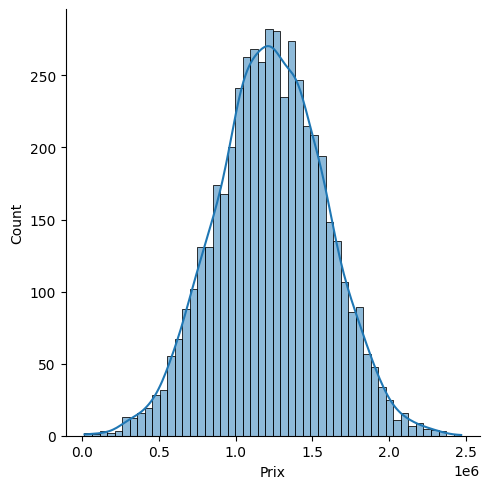

In [83]:
sns.displot(paris.Prix, bins = 50, kde = True)

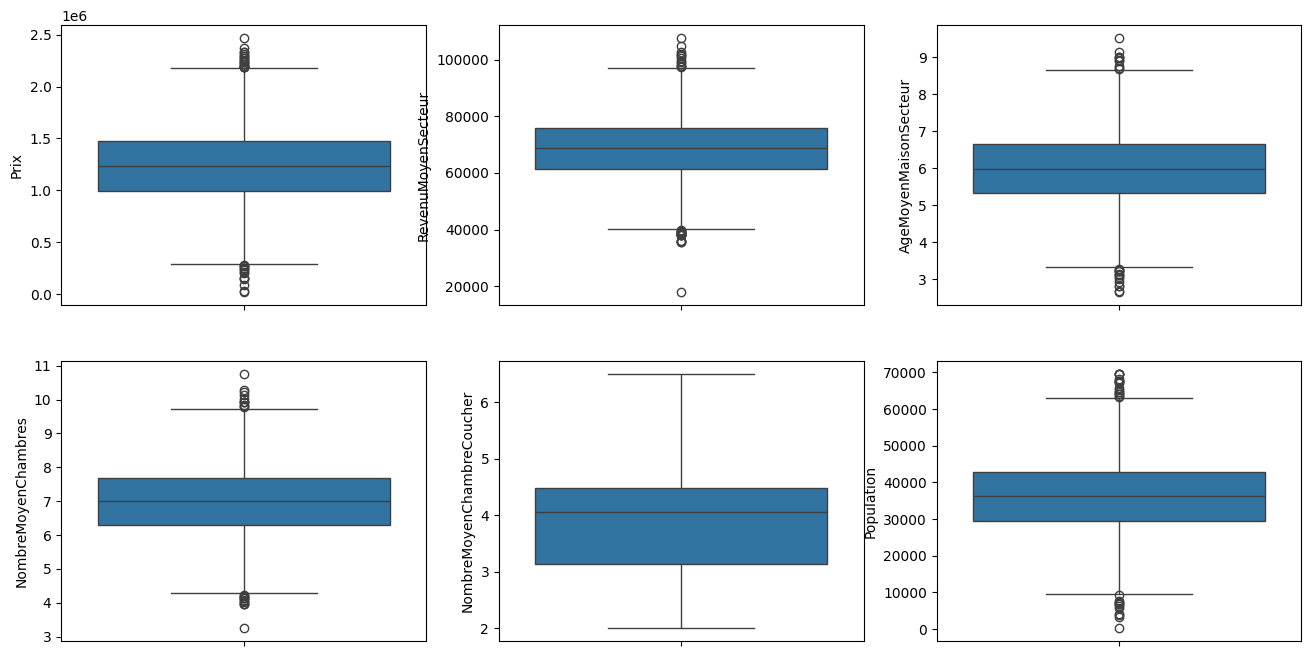

In [84]:
fig, axes = plt.subplots(2,3 , figsize = (16,8))
catplot1 = sns.boxplot(y = 'Prix', data = paris, ax = axes[0,0])
catplot1 = sns.boxplot(y = 'RevenuMoyenSecteur', data = paris, ax = axes[0,1])
catplot1 = sns.boxplot(y = 'AgeMoyenMaisonSecteur', data = paris, ax = axes[0,2])
catplot1 = sns.boxplot(y = 'NombreMoyenChambres', data = paris, ax = axes[1,0])
catplot1 = sns.boxplot(y = 'NombreMoyenChambreCoucher', data = paris, ax = axes[1,1])
catplot1 = sns.boxplot(y = 'Population', data = paris, ax = axes[1,2])

In [85]:
paris.corr()

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population,Prix
RevenuMoyenSecteur,1.000000,-0.001997,-0.011064,0.019788,-0.016234,0.639734
AgeMoyenMaisonSecteur,-0.001997,1.000000,-0.009357,0.006170,-0.018730,0.452575
NombreMoyenChambres,-0.011064,-0.009357,1.000000,0.462668,0.002038,0.335651
NombreMoyenChambreCoucher,0.019788,0.006170,0.462668,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018730,0.002038,-0.022168,1.000000,0.408556
Prix,0.639734,0.452575,0.335651,0.171071,0.408556,1.000000


<Axes: >

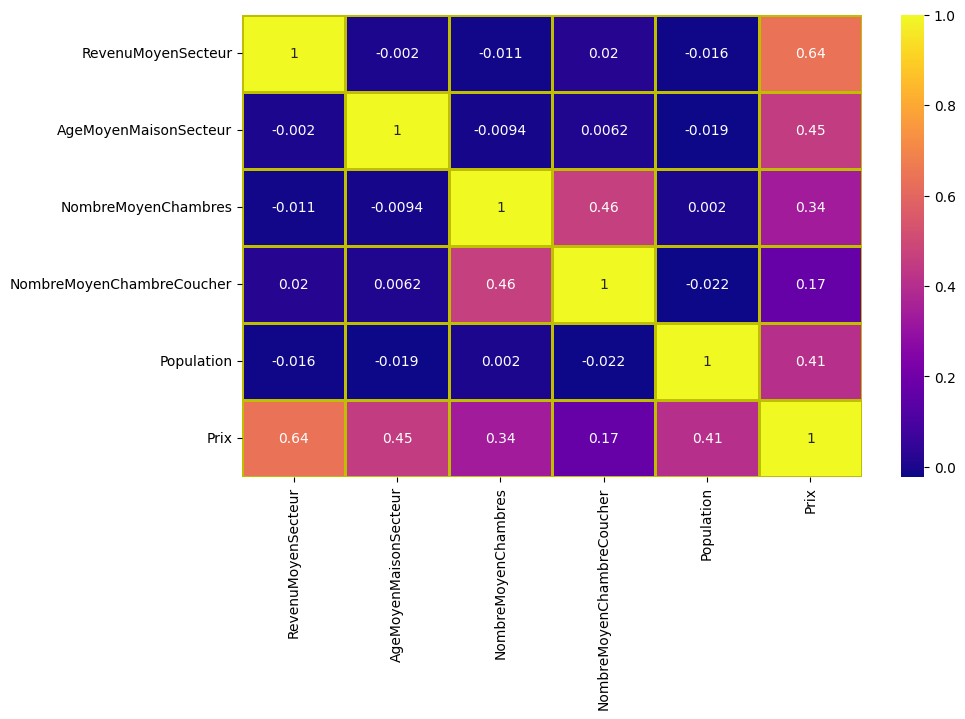

In [86]:
plt.figure(figsize = (10,6))
sns.heatmap(paris.corr(), annot = True, linewidths = 2, linecolor = 'y',cmap = 'plasma')

In [87]:
X = paris[['RevenuMoyenSecteur', 'AgeMoyenMaisonSecteur', 'NombreMoyenChambres', 
          'NombreMoyenChambreCoucher', 'Population']]

In [88]:
X

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population
0,79545.46,5.68,7.01,4.09,23086.80
1,79248.64,6.00,6.73,3.09,40173.07
2,61287.07,5.87,8.51,5.13,36882.16
3,63345.24,7.19,5.59,3.26,34310.24
4,59982.20,5.04,7.84,4.23,26354.11
...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36
4996,78491.28,7.00,6.58,4.02,25616.12
4997,63390.69,7.25,4.81,2.13,33266.15
4998,68001.33,5.53,7.13,5.44,42625.62


In [89]:
y = paris['Prix']

In [90]:
y.head(5)

0    1059033.56
1    1505890.91
2    1058987.99
3    1260616.81
4     630943.49
Name: Prix, dtype: float64

In [91]:
x_shape,y_shape = X.shape,y.shape
x_shape,y_shape

((5000, 5), (5000,))

In [92]:
y=y.values#car la methode reshape ne marche que sur les obect nd.array() de numpy
y = y.reshape(y.shape[0], 1) # il est vivement conseillé de redéfinir les dimensions de la matrice y
print(y.shape)
print(type(y))

(5000, 1)
<class 'numpy.ndarray'>


In [93]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) # randon_state agit comme np.random.seed(integer) ==> sert à avoir le meme resultat d'ordonnement/répartition de données à chaque lancement 
print('Données entrainment: ', X_train.shape)
print('Données de test: ', X_test.shape)

Données entrainment:  (4000, 5)
Données de test:  (1000, 5)


In [94]:
model = LinearRegression()

#### La classe LinearRegression de scikit-learn ne possède pas d'hyperparamètres à optimiser lors de l'entraînement du modèle. Cependant, il est important de noter que LinearRegression est un modèle linéaire simple qui ne possède pas de paramètres à régler de manière traditionnelle comme les modèles avec régularisation (par exemple, la régression ridge ou la régression LASSO).

In [95]:
model.fit(X_train, y_train)

LinearRegression()

In [96]:
print('Performance du modele sur la base des données apprentissage: ', model.score(X_train, y_train))

Performance du modele sur la base des données apprentissage:  0.9180820547878887


### MSE (Mean Squared Error) :

* La MSE est sensible aux valeurs aberrantes (outliers) car elle pénalise les erreurs quadratiques, ce qui signifie que les erreurs plus grandes sont amplifiées.
Elle est utile lorsque vous êtes plus préoccupé par les grandes erreurs, car elle accorde plus de poids aux erreurs plus importantes.
Elle est souvent utilisée dans des contextes où la distribution des erreurs est supposée être normale, car minimiser la MSE équivaut à maximiser la probabilité que les prédictions du modèle suivent une distribution normale.
MAE (Mean Absolute Error) :

* La MAE est moins sensible aux valeurs aberrantes que la MSE car elle utilise des erreurs absolues, ce qui signifie que chaque erreur contribue de manière linéaire à la métrique.
Elle est utile lorsque vous êtes plus préoccupé par l'écart moyen entre les prédictions du modèle et les valeurs réelles.
Elle est souvent utilisée dans des contextes où la distribution des erreurs n'est pas nécessairement normale, ou lorsque les valeurs aberrantes doivent être traitées de manière plus équitable.

In [111]:
# Utiliser MSE comme métrique d'évaluation
scores_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, verbose =20) #utiliser pourpénaliser les grand écart

# Utiliser MAE comme métrique d'évaluation
scores_mae = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print('\n',"scores_mse : ",scores_mse.mean(),'\n')
print("scores_mae : ",scores_mae.mean())

[CV] START .....................................................................
[CV] END ..................... score: (test=-10222072206.818) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................... score: (test=-9352511307.424) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................... score: (test=-10262315298.462) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................... score: (test=-10296485719.197) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................... score: (test=-10991420059.393) total time=   0.0s

 scores_mse :  -10224960918.258926 

scores_mae :  -81395.62636568976


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s


In [98]:
print(model.intercept_)

[-2631987.22654036]


In [99]:
model.coef_

array([[2.14380514e+01, 1.66075440e+05, 1.20578572e+05, 1.14497471e+03,
        1.53275619e+01]])

In [100]:
coefDataset = pd.DataFrame(data=model.coef_[0], index=X.columns, columns = ['Coefficients'])

In [101]:
coefDataset

,Coefficients
RevenuMoyenSecteur,21.438051
AgeMoyenMaisonSecteur,166075.439976
NombreMoyenChambres,120578.571870
NombreMoyenChambreCoucher,1144.974714
Population,15.327562


In [102]:
predictions = model.predict(X_test) #prédire les nouvelles valeurs X_test

In [103]:
print('La performance du modele sur la base des données du test :', model.score(X_test, y_test))

La performance du modele sur la base des données du test : 0.9176107184491983


In [104]:
print(predictions.shape)

(1000, 1)


In [105]:
print('y_test : ',y_test[:5])
print(y_test.shape)

y_test :  [[ 800809.13]
 [1620949.44]
 [1219637.37]
 [1172133.49]
 [ 864483.76]]
(1000, 1)


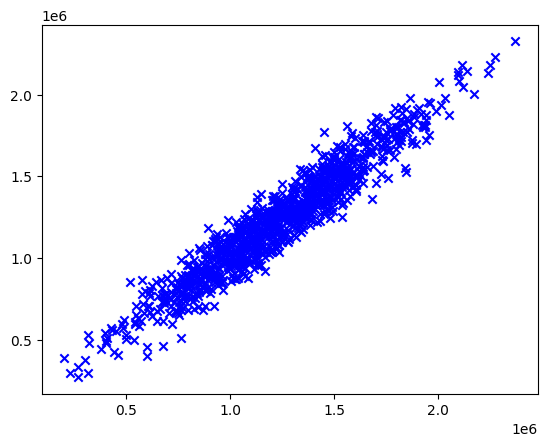

In [106]:
plt.scatter(y_test, predictions, c = 'b', marker= 'x')

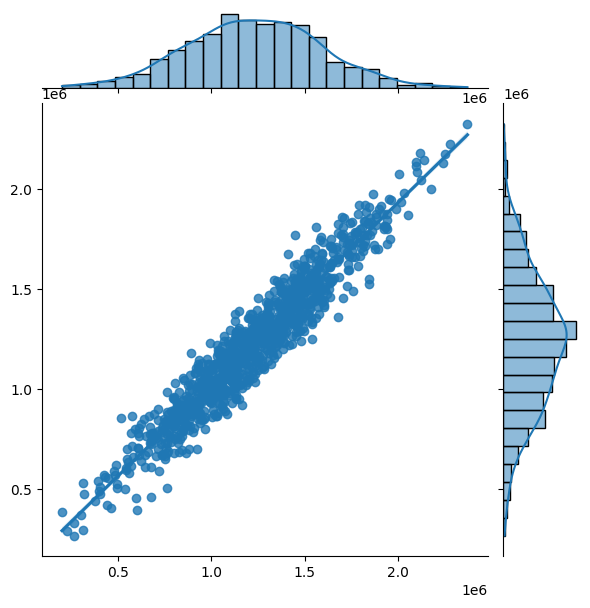

In [107]:
sns.jointplot(x=y_test.ravel(), y=predictions.ravel(), kind='reg')

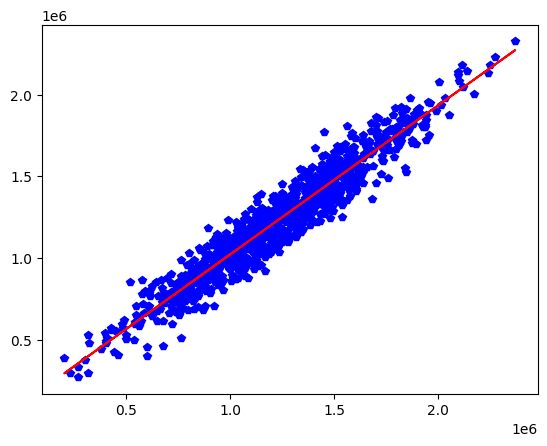

In [108]:
y_test.reshape((y_test.shape[0],1))
# y_test.ravel()#renvoie une vue seulement mieux vaut l'utiliser directement sur la methode utilisé ultérieurement.
m, b = np.polyfit(y_test.ravel(), predictions, deg=1) #deg mean function axis degree   # ///// #  .ravel() pour applatir un tableau xD en  un tableau unidimensionnel 1D 
# equation droite :y = m*X+b
plt.plot(y_test, predictions, 'bp', y_test, m*y_test + b, 'r') # la mention 'p' (pentagone) dans l'expression 'bp' crée le scatter sans mention le nom 'scatter'

In [109]:
residu = y_test - predictions

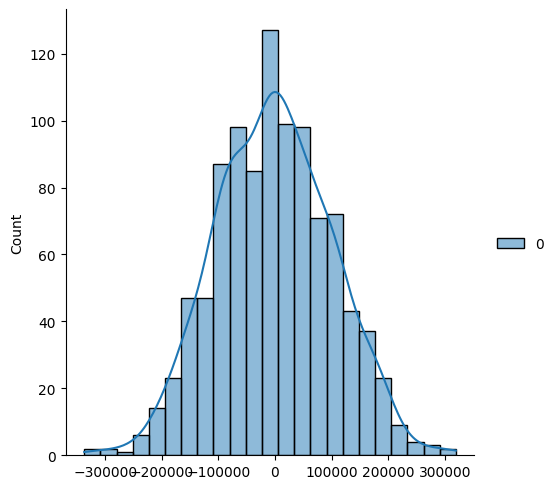

In [110]:
sns.displot(residu, kde = True)

#### L'erreur est centré autour du zéro ==> cela montre que le modèle choisi est bon 